## Steinmetz Dataset for the Python workshop

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fname = [
    "steinmetz_part0.npz",
    "steinmetz_part1.npz",
    "steinmetz_part2.npz",
]

alldat = np.array([])
for j in range(len(fname)):
  alldat = np.hstack((alldat, np.load('steinmetz_part%d.npz'%j, allow_pickle=True)['dat']))

In [3]:
len(alldat), len(np.unique([d["mouse_name"] for d in alldat]))

(39, 10)

In [4]:
mouse_idx = 11
dat = alldat[mouse_idx]

In [5]:
dat.keys()

dict_keys(['spks', 'wheel', 'pupil', 'response', 'response_time', 'bin_size', 'stim_onset', 'contrast_right', 'contrast_left', 'brain_area', 'feedback_time', 'feedback_type', 'gocue', 'mouse_name', 'date_exp', 'trough_to_peak', 'active_trials', 'contrast_left_passive', 'contrast_right_passive', 'spks_passive', 'pupil_passive', 'wheel_passive', 'prev_reward', 'ccf', 'ccf_axes', 'cellid_orig', 'reaction_time', 'face', 'face_passive', 'licks', 'licks_passive'])

### Important keys

* `dat['spks']`: neurons by trials by time bins.    
* `dat['brain_area']`: brain area for each neuron recorded.
* `dat['bin_size']`: bin size over which a spike was detected.
* `dat['response_time']`: when the response was registered, which has to be after the go cue. The mouse can turn the wheel before the go cue (and nearly always does!), but the stimulus on the screen won't move before the go cue. 

In [6]:
dat['spks'].shape

(698, 340, 250)

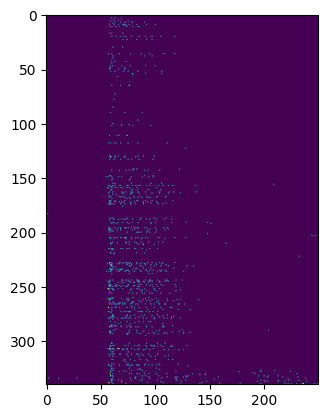

In [7]:
neuron_idx = 4
plt.imshow(dat['spks'][neuron_idx])

### Turning this into a raster plot

In [8]:
dt = dat['bin_size']  # binning at 10 ms
n_bins = dat['spks'].shape[-1]
timepoints = np.arange(n_bins) * dt

In [9]:
spikes = dat["spks"]
neuron_spike_time = [timepoints[trial==1].tolist() for trial in spikes[neuron_idx]]

In [10]:
len(neuron_spike_time)

340

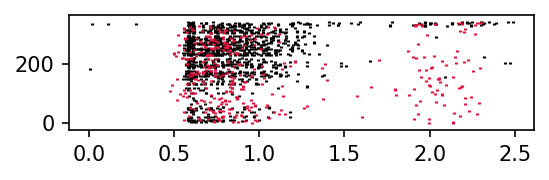

In [11]:
fig, ax = plt.subplots(figsize=(4, 1), dpi=150)
ax.eventplot(neuron_spike_time, colors="k", linewidths=1.5, linelengths=7)
# ax.eventplot(dat["gocue"], colors="crimson", linewidths=1.5, linelengths=7);
ax.eventplot(dat["response_time"], colors="crimson", linewidths=1.5, linelengths=7);


In [12]:
dat["response_time"].shape

(340, 1)

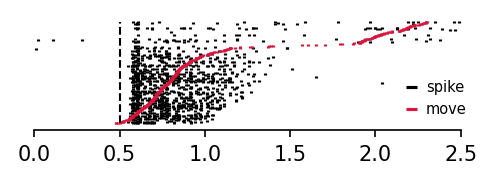

In [13]:
response_time_order_idx = np.argsort(dat["response_time"].flatten())
fig, ax = plt.subplots(figsize=(4, 1), dpi=150)

neuron_spike_time_sorted = [neuron_spike_time[idx] for idx in response_time_order_idx]
ax.eventplot(neuron_spike_time_sorted, colors="k", linewidths=1.5, linelengths=7)
ax.eventplot(dat["response_time"][response_time_order_idx], colors="crimson", linewidths=1.5, linelengths=7);
ax.vlines(x=.5, ymin=0, ymax=len(neuron_spike_time_sorted), colors="k", linestyles="dashed", lw=1)
ax.set(yticks=[])
sns.despine(left=True, trim=True)

ax.eventplot(neuron_spike_time_sorted[0], colors="k", linewidths=1.5, linelengths=7, label="spike")
ax.eventplot(dat["response_time"][response_time_order_idx][0], colors="crimson", linewidths=1.5, linelengths=7, label="move")
lgnd = ax.legend(fontsize=7, loc="lower right", frameon=False)

# Modify the marker length for the first eventplot in legend
for handle in lgnd.legend_handles:
    xdata, ydata = handle.get_data()
    handle.set_data([10.0, 15.0], [2.45, 2.45])  # Change length

## Electrodes location for a single session

In [14]:
dat["ccf"].shape, dat['ccf_axes']

((698, 3), ['ap', 'dv', 'lr'])

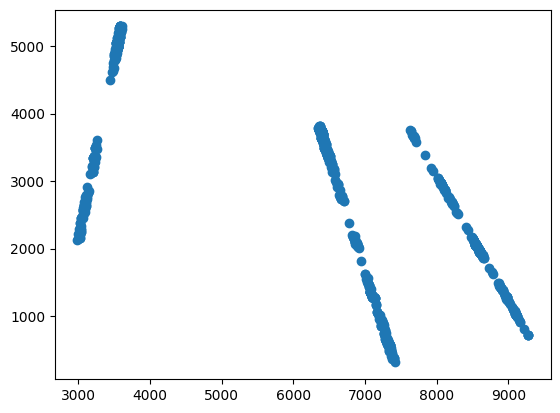

In [15]:
plt.scatter(*dat["ccf"][:, :-1].T)

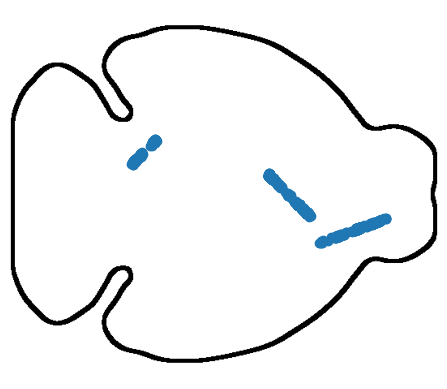

In [16]:
from iblatlas.atlas import AllenAtlas
from skimage import feature, morphology, filters

def get_borders(x):
    x[x > 0] = 1
    x = x.astype(np.float64)
    blurred = filters.gaussian(x, sigma=10)
    edges = feature.canny(blurred, sigma=1)
    thick_edges = morphology.dilation(edges, morphology.square(5))
    return thick_edges

res = 25
brain_atlas = AllenAtlas(res_um=res)

lab = brain_atlas.label.transpose(2, 0, 1)[160]
fig, ax = plt.subplots()
ax.imshow(get_borders(lab).T[:, ::-1], cmap="gray_r", origin="lower")
ax.scatter(*dat["ccf"][:, [0, 2]].T * 5e-2)
ax.set(xticks=[], yticks=[])
for spine in ax.spines.values():
    spine.set_visible(False)

## Average population response for different behavioral response

## Average population response for different behavioral response, rewarded vs not

## Analysis of the behabioral performance of all mice across all conditions (16 combinations of contrast and 3 behavioral response: left, right, nogo)

## Psychometric analysis

In [83]:
data = alldat
session_list=[]
for d in data:

    response_interval = -d['gocue'] + d['response_time']
    mouse_name = d['mouse_name']
    print(mouse_name)
    date_exp = d['date_exp']
    feedback_type = d['feedback_type']
    contrast_right = d['contrast_right']
    contrast_left = d['contrast_left']
    response = d['response']
    data_cols = { 'response_interval':np.array(response_interval).flatten(),
                  'feedback_type' : np.array(feedback_type).flatten(),
                 'contrast_right': np.array(contrast_right).flatten(),
                'contrast_left': np.array(contrast_left).flatten(),
                'response': np.array(response).flatten(), 
                'gocue': np.array(d['gocue']).flatten(), 
                'response_time': np.array(d['response_time']).flatten()
                }

    session_df = pd.DataFrame(data_cols)
    session_df['mouse_name'] = mouse_name
    session_df['date_exp'] = date_exp

    session_list.append(session_df)



response_df = pd.concat(session_list).reset_index(drop=True)


Cori
Cori
Cori
Forssmann
Forssmann
Forssmann
Forssmann
Hench
Hench
Hench
Hench
Lederberg
Lederberg
Lederberg
Lederberg
Lederberg
Lederberg
Lederberg
Moniz
Moniz
Moniz
Muller
Muller
Muller
Radnitz
Radnitz
Radnitz
Radnitz
Radnitz
Richards
Richards
Richards
Richards
Richards
Tatum
Tatum
Tatum
Tatum
Theiler


In [84]:
response_df

,response_interval,feedback_type,contrast_right,contrast_left,response,gocue,response_time,mouse_name,date_exp
0,0.122987,1.0,0.00,1.0,1.0,1.027216,1.150204,Cori,2016-12-14
1,0.525089,1.0,0.50,0.0,-1.0,0.874414,1.399503,Cori,2016-12-14
2,0.124078,1.0,0.50,1.0,1.0,0.825213,0.949291,Cori,2016-12-14
3,1.505190,1.0,0.00,0.0,0.0,0.761612,2.266802,Cori,2016-12-14
4,0.154765,-1.0,1.00,0.5,1.0,0.662010,0.816776,Cori,2016-12-14
...,...,...,...,...,...,...,...,...,...
10045,1.503406,-1.0,0.25,1.0,0.0,0.794097,2.297503,Theiler,2017-10-11
10046,0.634104,-1.0,0.25,1.0,-1.0,0.524700,1.158803,Theiler,2017-10-11
10047,1.499452,-1.0,0.25,1.0,0.0,0.504257,2.003709,Theiler,2017-10-11
10048,1.502495,-1.0,0.25,1.0,0.0,0.574262,2.076758,Theiler,2017-10-11


In [85]:
dfm = response_df.copy()

turn_dir = np.sign(dfm["contrast_left"] - dfm["contrast_right"])
dfm["correct_turn"] = turn_dir.apply(lambda x: ["nogo", "right", "left"][int(x)])
dfm["response_turn"] = dfm["response"].apply(lambda x: ["nogo", "right", "left"][int(x)])
dfm

,response_interval,feedback_type,contrast_right,contrast_left,response,gocue,response_time,mouse_name,date_exp,correct_turn,response_turn
0,0.122987,1.0,0.00,1.0,1.0,1.027216,1.150204,Cori,2016-12-14,right,right
1,0.525089,1.0,0.50,0.0,-1.0,0.874414,1.399503,Cori,2016-12-14,left,left
2,0.124078,1.0,0.50,1.0,1.0,0.825213,0.949291,Cori,2016-12-14,right,right
3,1.505190,1.0,0.00,0.0,0.0,0.761612,2.266802,Cori,2016-12-14,nogo,nogo
4,0.154765,-1.0,1.00,0.5,1.0,0.662010,0.816776,Cori,2016-12-14,left,right
...,...,...,...,...,...,...,...,...,...,...,...
10045,1.503406,-1.0,0.25,1.0,0.0,0.794097,2.297503,Theiler,2017-10-11,right,nogo
10046,0.634104,-1.0,0.25,1.0,-1.0,0.524700,1.158803,Theiler,2017-10-11,right,left
10047,1.499452,-1.0,0.25,1.0,0.0,0.504257,2.003709,Theiler,2017-10-11,right,nogo
10048,1.502495,-1.0,0.25,1.0,0.0,0.574262,2.076758,Theiler,2017-10-11,right,nogo


In [20]:
dfm["left_minus_right_contrast"] = dfm["contrast_left"] - dfm["contrast_right"]

In [21]:
dfm

,response_interval,feedback_type,contrast_right,contrast_left,response,mouse_name,date_exp,correct_turn,response_turn,left_minus_right_contrast
0,0.122987,1.0,0.00,1.0,1.0,Cori,2016-12-14,right,right,1.00
1,0.525089,1.0,0.50,0.0,-1.0,Cori,2016-12-14,left,left,-0.50
2,0.124078,1.0,0.50,1.0,1.0,Cori,2016-12-14,right,right,0.50
3,1.505190,1.0,0.00,0.0,0.0,Cori,2016-12-14,nogo,nogo,0.00
4,0.154765,-1.0,1.00,0.5,1.0,Cori,2016-12-14,left,right,-0.50
...,...,...,...,...,...,...,...,...,...,...
338,1.503406,-1.0,0.25,1.0,0.0,Theiler,2017-10-11,right,nogo,0.75
339,0.634104,-1.0,0.25,1.0,-1.0,Theiler,2017-10-11,right,left,0.75
340,1.499452,-1.0,0.25,1.0,0.0,Theiler,2017-10-11,right,nogo,0.75
341,1.502495,-1.0,0.25,1.0,0.0,Theiler,2017-10-11,right,nogo,0.75


In [22]:
left_minus_right_contrast, turned_right = dfm.groupby("left_minus_right_contrast").apply(lambda x: sum(x.response_turn == "right")/len(x)).reset_index().values.T

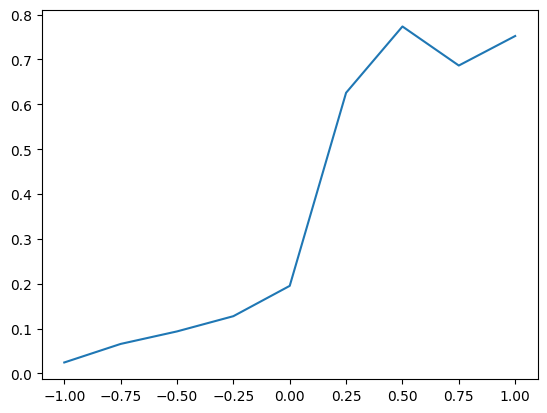

In [23]:
plt.plot(left_minus_right_contrast, turned_right)

## Analysis of continuous variables

Below is a list of all continuous variables
* `dat['gocue']`: when the go cue sound was played. 
* `dat['response_time']`: when the response was registered, which has to be after the go cue. The mouse can turn the wheel before the go cue (and nearly always does!), but the stimulus on the screen won't move before the go cue.
* `dat['feedback_time']`: when feedback was provided. 
* `dat['wheel']`: turning speed of the wheel that the mice uses to make a response, sampled at `10ms`. 
* `dat['pupil']`: pupil area  (noisy, because pupil is very small) + pupil horizontal and vertical position.
* `dat['reaction_time']`: ntrials by 2. First column: reaction time computed from the wheel movement as the first sample above `5` ticks/10ms bin. Second column: direction of the wheel movement (`0` = no move detected).  

In [24]:
dat["spks"].shape

(698, 340, 250)

### Does pupil dilation indicative of being correct?

In [25]:
dat["response"].shape

(340,)

In [26]:
dt = dat['bin_size']  # binning at 10 ms
n_bins = dat['spks'].shape[-1]
timepoints = np.arange(n_bins) * dt

In [27]:
dat["gocue"].shape

(340, 1)

[Text(0.5, 0, 'Time'), Text(0, 0.5, 'Wheel speed')]

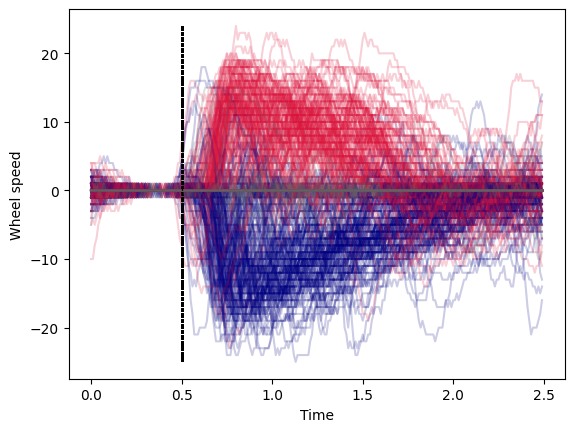

In [28]:
fig, ax = plt.subplots()
color = [{-1: "navy", 0: ".4", 1: "crimson"}[res] for res in dat["response"]]
for idx, wheel in enumerate(dat["wheel"][0]):
    ax.plot(timepoints, wheel, c=color[idx], alpha=.2);
    ax.vlines(.5, ymin=np.max(dat["wheel"][0]), ymax=np.min(dat["wheel"][0]), color="k", ls="--", lw=.75)
    # ax.vlines(dat["response_time"][idx], ymin=np.max(dat["wheel"][0]), ymax=np.min(dat["wheel"][0]), color="darkorange", ls="--", lw=.75)
    # ax.vlines(dat["gocue"][idx], ymin=np.max(dat["wheel"][0]), ymax=np.min(dat["wheel"][0]), color="darkorange", ls="--", lw=.75)
    
ax.set(xlabel="Time", ylabel="Wheel speed")

## Pupil location 

In [136]:
indices = dfm[(dfm.feedback_type == -1) & (dfm.response_turn == "right")].index.values

In [137]:
len(indices)

735

In [138]:
all_trials_xy = np.concatenate([data["pupil"][1:] for idx, data in enumerate(alldat)], axis=1)
all_trials_xy_correct_and_moved = all_trials_xy[:, indices]

In [139]:
_, n_trials, n_timepoints = all_trials_xy_correct_and_moved.shape

In [140]:
all_trials_xy_correct_and_moved.transpose(1, 0, 2).shape

(735, 2, 250)

In [141]:
pupil_xy_relevant = []
for idx, trial in zip(indices, all_trials_xy_correct_and_moved.transpose(1, 0, 2)):
    gocue = dfm.loc[idx, "gocue"]
    response_time = dfm.loc[idx, "response_time"]
    timepoints = np.arange(trial.shape[1]) * 1e-2
    if response_time > 2.5:
        continue
    assert response_time <= 2.5
    assert response_time >= gocue
    mask = (timepoints >= gocue) * (timepoints <= response_time)
    pupil_xy_relevant.append(trial[:, mask])
    # break

In [142]:
np.hstack(pupil_xy_relevant)

array([[ 1.63633721,  1.89225487,  2.08493443, ..., -0.72380202,
        -0.70221864, -0.70321877],
       [ 1.41480638,  0.61260284,  0.74979202, ..., -0.11268906,
        -0.06149722,  0.01432968]])

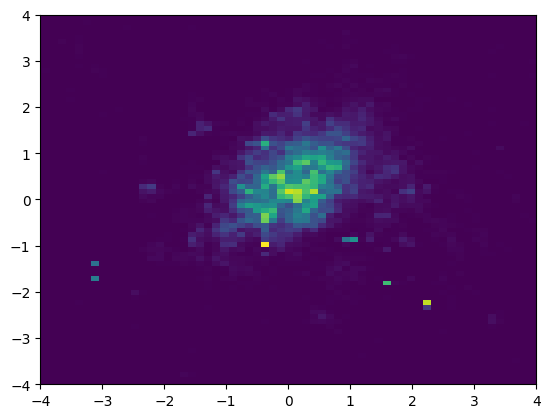

In [143]:
plt.hist2d(*np.hstack(pupil_xy_relevant), bins=300)
plt.xlim(-4, 4)
plt.ylim(-4, 4);

In [117]:
(dfm.loc[indices]["response_time"] > 2.5).sum()

2

In [110]:
response_time

2.600968029142223

In [104]:
trial.shape

(2518, 250)

In [99]:
trial.shape

(2518, 250)

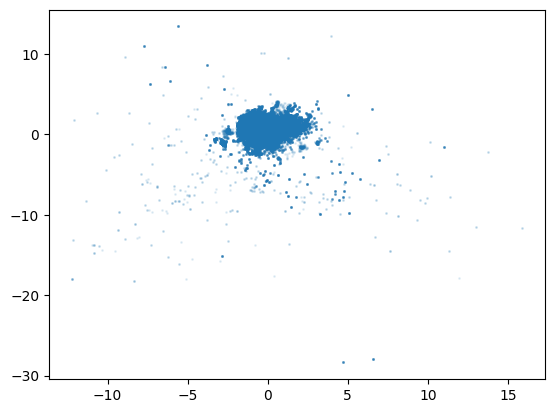

In [66]:
plt.scatter(*all_trials_xy_correct_and_moved.reshape(2, n_trials*n_timepoints), s=1, alpha=.1)

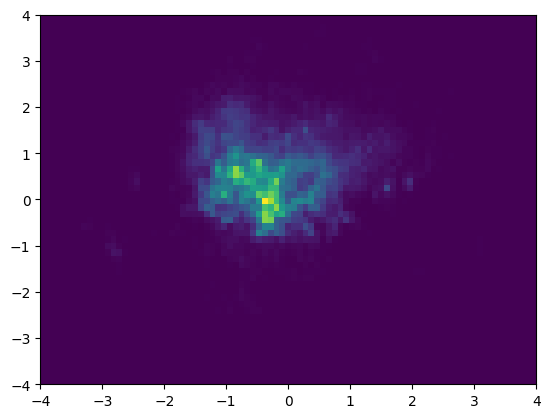

In [71]:
plt.hist2d(*all_trials_xy_correct_and_moved.reshape(2, n_trials*n_timepoints), bins=300)
plt.xlim(-4, 4)
plt.ylim(-4, 4);

In [ ]:
plt.scatter()

In [49]:
dfm

,response_interval,feedback_type,contrast_right,contrast_left,response,mouse_name,date_exp,correct_turn,response_turn,left_minus_right_contrast
0,0.122987,1.0,0.00,1.0,1.0,Cori,2016-12-14,right,right,1.00
1,0.525089,1.0,0.50,0.0,-1.0,Cori,2016-12-14,left,left,-0.50
2,0.124078,1.0,0.50,1.0,1.0,Cori,2016-12-14,right,right,0.50
3,1.505190,1.0,0.00,0.0,0.0,Cori,2016-12-14,nogo,nogo,0.00
4,0.154765,-1.0,1.00,0.5,1.0,Cori,2016-12-14,left,right,-0.50
...,...,...,...,...,...,...,...,...,...,...
338,1.503406,-1.0,0.25,1.0,0.0,Theiler,2017-10-11,right,nogo,0.75
339,0.634104,-1.0,0.25,1.0,-1.0,Theiler,2017-10-11,right,left,0.75
340,1.499452,-1.0,0.25,1.0,0.0,Theiler,2017-10-11,right,nogo,0.75
341,1.502495,-1.0,0.25,1.0,0.0,Theiler,2017-10-11,right,nogo,0.75


### Pupil dilation

In [69]:
wheel_speed = dat["wheel"][0]
pupil_dilation = dat["pupil"][0]
pupil_location = dat["pupil"][1:]

In [70]:
def normalize(x):
    aa = x - x.min()
    return aa / aa.max()

[(-0.05, 0.15), Text(0.5, 0, 'Time'), Text(0, 0.5, 'Pupil dilation')]

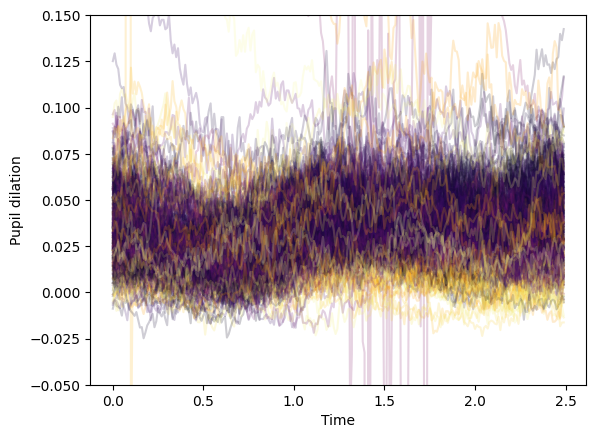

In [74]:
fig, ax = plt.subplots()
# color = [{-1: "navy", 0: ".4", 1: "crimson"}[res] for res in dat["response"]]
# color = [{-1: "navy", 1: "crimson"}[res] for res in dat["feedback_type"]]
color = [plt.cm.inferno(res) for res in normalize(dat["response_time"].flatten())]
for idx, pd in enumerate(pupil_dilation):
    ax.plot(timepoints, pd, c=color[idx], alpha=.2);
    
ax.set(ylim=(-.05, .15), xlabel="Time", ylabel="Pupil dilation")

### Wheel speed vs pupil dilation (correct vs wrong trials)

340


[(-0.05, 0.15), Text(0.5, 0, 'Wheel speed'), Text(0, 0.5, 'Pupil dilation')]

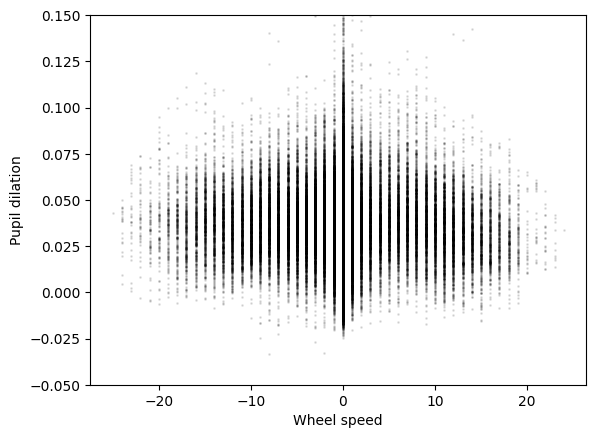

In [75]:
fig, ax = plt.subplots()
counter = 0
for idx, (ws, pd) in enumerate(zip(wheel_speed, pupil_dilation)):
    ax.scatter(ws, pd, c="k", s=1, alpha=.1)
    counter += 1

print(counter)
ax.set(ylim=(-.05, .15), xlabel="Wheel speed", ylabel="Pupil dilation")

340


[(-0.05, 0.15), Text(0.5, 0, 'Wheel speed'), Text(0, 0.5, 'Pupil dilation')]

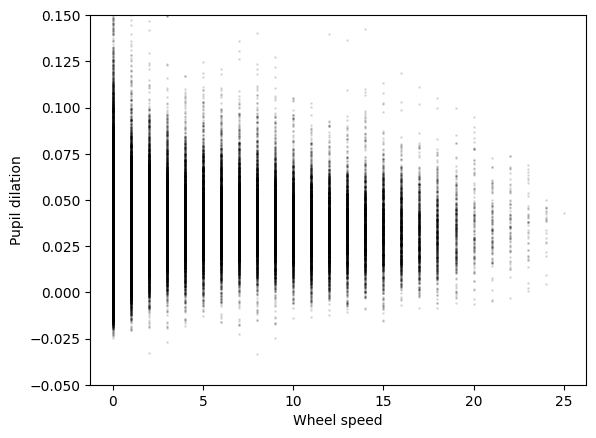

In [76]:
fig, ax = plt.subplots()
counter = 0
for idx, (ws, pd) in enumerate(zip(wheel_speed, pupil_dilation)):
    ax.scatter(np.abs(ws), pd, c="k", s=1, alpha=.1)
    counter += 1

print(counter)
ax.set(ylim=(-.05, .15), xlabel="Wheel speed", ylabel="Pupil dilation")

In [82]:
noise_scale = np.abs(np.diff(np.sort(np.unique(wheel_speed.flatten())))).min()

340


[(-0.05, 0.15), Text(0.5, 0, 'Wheel speed'), Text(0, 0.5, 'Pupil dilation')]

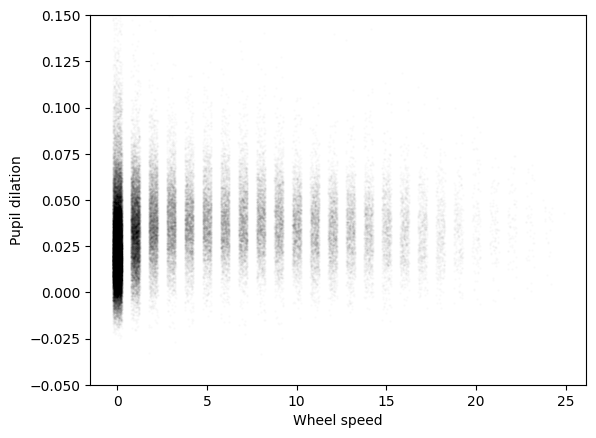

In [86]:
fig, ax = plt.subplots()
counter = 0
for idx, (ws, pd) in enumerate(zip(wheel_speed, pupil_dilation)):
    ax.scatter(np.abs(ws) + (np.random.rand(len(ws)) * .5) - .25, pd, c="k", s=1, alpha=.01)
    counter += 1

print(counter)
ax.set(ylim=(-.05, .15), xlabel="Wheel speed", ylabel="Pupil dilation")

201


[(-0.05, 0.15), Text(0.5, 0, 'Wheel speed'), Text(0, 0.5, 'Pupil dilation')]

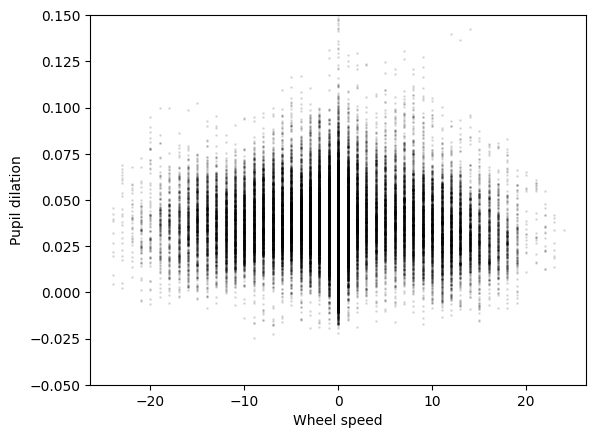

In [26]:
fig, ax = plt.subplots()
counter = 0
for idx, (ws, pd) in enumerate(zip(wheel_speed, pupil_dilation)):
    if (dat["feedback_type"][idx] == 1) and (dat["response"][idx] != 0):
        ax.scatter(ws, pd, c="k", s=1, alpha=.1)
        counter += 1

print(counter)
ax.set(ylim=(-.05, .15), xlabel="Wheel speed", ylabel="Pupil dilation")

### Do any of the behabioral variables correlate with any of the PCs from the neural data?

In [28]:
dat['spks'].shape

(698, 340, 250)

[Text(0.5, 0, 'time (sec)'), Text(0, 0.5, 'firing rate (Hz)')]

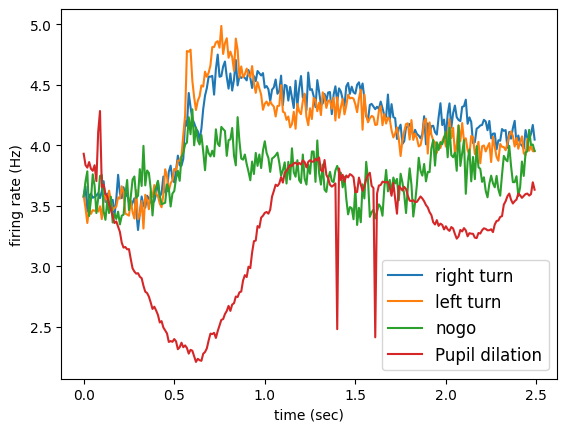

In [92]:
dt = dat['bin_size']  # binning at 10 ms
n_bins = dat['spks'].shape[-1]
timepoints = np.arange(n_bins) * dt
firing_rate = 1/dt * dat['spks']
response = dat['response']

fig, ax = plt.subplots()
ax.plot(timepoints, firing_rate[:, response > 0].mean(axis=(0, 1)), label="right turn")
ax.plot(timepoints, firing_rate[:, response < 0].mean(axis=(0, 1)), label="left turn")
ax.plot(timepoints, firing_rate[:, response == 0].mean(axis=(0, 1)), label="nogo")
ax.plot(timepoints, (pupil_dilation.mean(axis=0))*100, label="Pupil dilation")
ax.set(xlabel="Wheel speed", ylabel="Pupil dilation")

plt.legend(fontsize=12)
ax.set(xlabel='time (sec)', ylabel='firing rate (Hz)')

In [93]:
from sklearn.decomposition import PCA

firing_rate_used_for_PCA = firing_rate[..., 51:130]
n_neurons, n_trials, n_timepoints = firing_rate_used_for_PCA.shape

n_components = 5
model = PCA(n_components=n_components).fit(
    firing_rate_used_for_PCA.reshape(n_neurons, n_trials*n_timepoints).T
    )
W = model.components_
PCs = (W @ firing_rate.reshape(n_neurons, n_trials*firing_rate.shape[-1]))
PCs = PCs.reshape(n_components, n_trials, firing_rate.shape[-1])

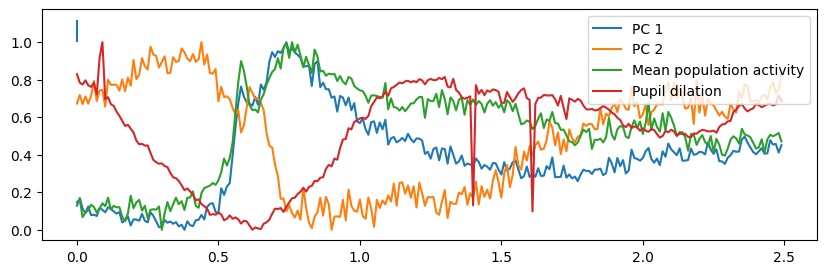

In [95]:
fig, ax = plt.subplots(figsize=(10, 3))
PC_idx = 0
ax.plot(timepoints, normalize(PCs[PC_idx].mean(axis=0)), label=f"PC {PC_idx+1}")
PC_idx = 1
ax.plot(timepoints, normalize(PCs[PC_idx].mean(axis=0)), label=f"PC {PC_idx+1}")
ax.plot(timepoints, normalize(firing_rate.mean(axis=0).mean(axis=0)), label="Mean population activity")
ax.plot(timepoints, normalize(pupil_dilation.mean(axis=0)), label="Pupil dilation")
ax.vlines(0, 1, dat["feedback_time"].flatten().mean())
plt.legend()

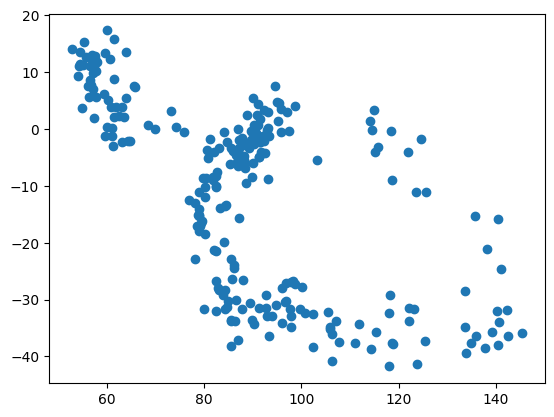

In [75]:
fig, ax = plt.subplots()
ax.scatter(PCs[0].mean(axis=0), PCs[1].mean(axis=0))
# ax.scatter(PCs[0].mean(axis=0), pupil_dilation.mean(axis=0))

[Text(0.5, 0, 'PC 1'), Text(0, 0.5, 'Firing rate')]

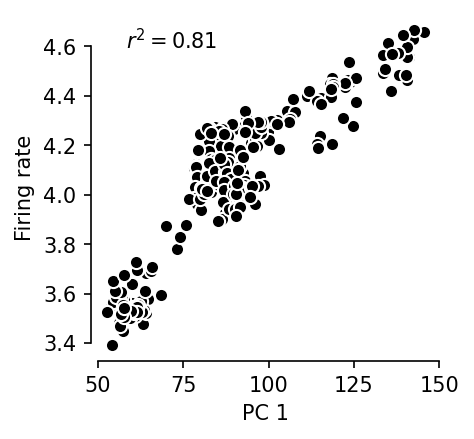

In [148]:
fig, ax = plt.subplots(figsize=(3, 3), dpi=150)
d1 = PCs[0].mean(axis=0)
d2 = firing_rate.mean(axis=0).mean(axis=0)
ax.scatter(d1, d2,s=40, c="k", ec="w")
sns.despine(trim=True)
r_squared = np.corrcoef(d1, d2)[0, 1] ** 2
ax.text(x=.1, y=.9, s=fr"$r^2 = {r_squared:.2f}$", transform=ax.transAxes)
ax.set(xlabel="PC 1", ylabel="Firing rate")

[Text(0.5, 0, 'PC 2'), Text(0, 0.5, 'Pupil dilation')]

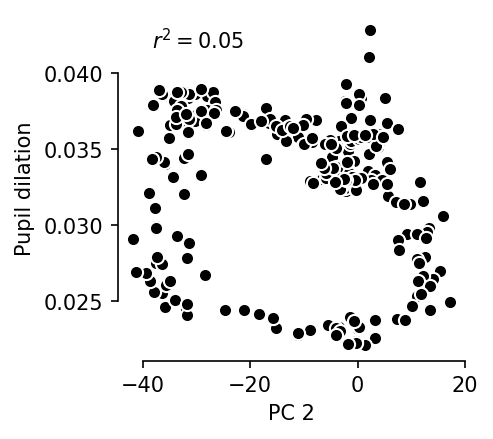

In [149]:
fig, ax = plt.subplots(figsize=(3, 3), dpi=150)
d1 = PCs[1].mean(axis=0)
d2 = pupil_dilation.mean(axis=0)
ax.scatter(d1, d2,s=40, c="k", ec="w")
sns.despine(trim=True)
r_squared = np.corrcoef(d1, d2)[0, 1] ** 2
ax.text(x=.1, y=.9, s=fr"$r^2 = {r_squared:.2f}$", transform=ax.transAxes)
ax.set(xlabel="PC 2", ylabel="Pupil dilation")

[Text(0.5, 0, 'PC 1'), Text(0, 0.5, 'Pupil dilation')]

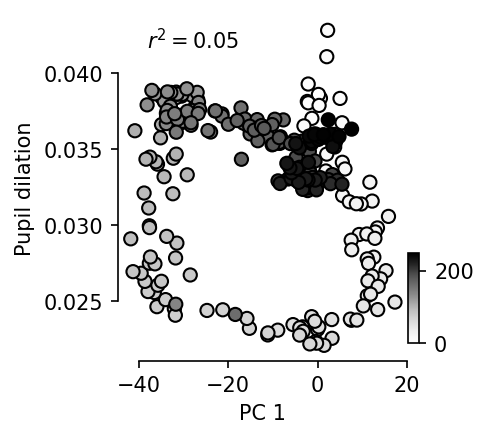

In [154]:
fig, ax = plt.subplots(figsize=(2.5, 3), dpi=150)
d1 = PCs[1].mean(axis=0)
d2 = pupil_dilation.mean(axis=0)
im = ax.scatter(d1, d2, s=40, c=np.arange(len(timepoints)), ec="k", cmap=plt.cm.Greys)
sns.despine(trim=True)
r_squared = np.corrcoef(d1, d2)[0, 1] ** 2
ax.text(x=.1, y=.9, s=fr"$r^2 = {r_squared:.2f}$", transform=ax.transAxes)

cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.2]) 
plt.colorbar(im, cax=cbar_ax)
ax.set(xlabel="PC 1", ylabel="Pupil dilation")

[Text(0.5, 0, 'PC 1'), Text(0, 0.5, 'Pupil dilation')]

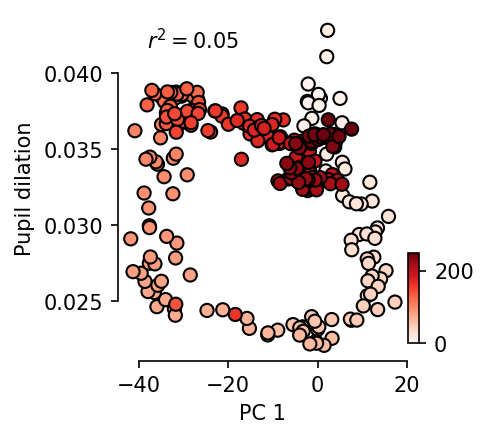

In [156]:
fig, ax = plt.subplots(figsize=(2.5, 3), dpi=150)
d1 = PCs[1].mean(axis=0)
d2 = pupil_dilation.mean(axis=0)
im = ax.scatter(d1, d2, s=40, c=np.arange(len(timepoints)), ec="k", cmap=plt.cm.Reds)
sns.despine(trim=True)
r_squared = np.corrcoef(d1, d2)[0, 1] ** 2
ax.text(x=.1, y=.9, s=fr"$r^2 = {r_squared:.2f}$", transform=ax.transAxes)

cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.2]) 
plt.colorbar(im, cax=cbar_ax)
ax.set(xlabel="PC 1", ylabel="Pupil dilation")

[Text(0.5, 0, 'PC 1'), Text(0, 0.5, 'Pupil dilation')]

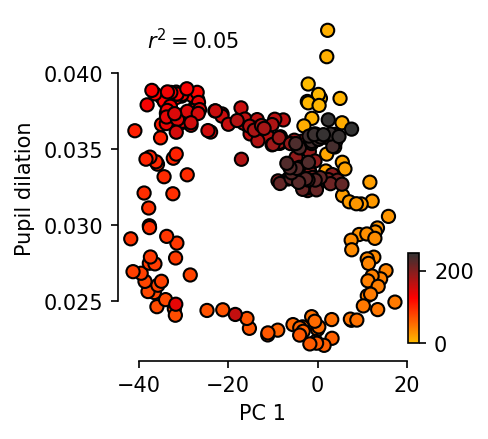

In [167]:
fig, ax = plt.subplots(figsize=(2.5, 3), dpi=150)
d1 = PCs[1].mean(axis=0)
d2 = pupil_dilation.mean(axis=0)

colors = [
    "#FFBC00",
    "red",
    ".2",
    ]
cmap = sns.blend_palette(colors, as_cmap=True)

im = ax.scatter(d1, d2, s=40, c=np.arange(len(timepoints)), ec="k", cmap=cmap)
sns.despine(trim=True)
r_squared = np.corrcoef(d1, d2)[0, 1] ** 2
ax.text(x=.1, y=.9, s=fr"$r^2 = {r_squared:.2f}$", transform=ax.transAxes)

cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.2]) 
plt.colorbar(im, cax=cbar_ax)
ax.set(xlabel="PC 1", ylabel="Pupil dilation")

In [96]:
for name, dd in dfm.groupby("response_turn"):
    print(name)

left
nogo
right


In [97]:
dd

,response_interval,feedback_type,contrast_right,contrast_left,response,mouse_name,date_exp,correct_turn,response_turn,left_minus_right_contrast
0,0.122987,1.0,0.00,1.0,1.0,Cori,2016-12-14,right,right,1.00
2,0.124078,1.0,0.50,1.0,1.0,Cori,2016-12-14,right,right,0.50
4,0.154765,-1.0,1.00,0.5,1.0,Cori,2016-12-14,left,right,-0.50
5,0.330288,-1.0,0.00,0.0,1.0,Cori,2016-12-14,nogo,right,0.00
9,0.178451,1.0,0.50,1.0,1.0,Cori,2016-12-14,right,right,0.50
...,...,...,...,...,...,...,...,...,...,...
307,0.165424,1.0,0.25,1.0,1.0,Theiler,2017-10-11,right,right,0.75
310,0.354942,1.0,0.00,1.0,1.0,Theiler,2017-10-11,right,right,1.00
311,0.275684,1.0,0.00,0.5,1.0,Theiler,2017-10-11,right,right,0.50
321,0.087128,1.0,0.00,1.0,1.0,Theiler,2017-10-11,right,right,1.00


In [54]:
for name, ddd in dd.groupby(["contrast_left", "contrast_right"]):
    print(ddd.feedback_type.value_counts(normalize=True))

feedback_type
-1.0    1.0
Name: proportion, dtype: float64
feedback_type
-1.0    1.0
Name: proportion, dtype: float64
feedback_type
-1.0    1.0
Name: proportion, dtype: float64
feedback_type
-1.0    1.0
Name: proportion, dtype: float64
feedback_type
1.0    1.0
Name: proportion, dtype: float64
feedback_type
 1.0    0.526316
-1.0    0.473684
Name: proportion, dtype: float64
feedback_type
-1.0    1.0
Name: proportion, dtype: float64
feedback_type
-1.0    1.0
Name: proportion, dtype: float64
feedback_type
1.0    1.0
Name: proportion, dtype: float64
feedback_type
1.0    1.0
Name: proportion, dtype: float64
feedback_type
 1.0    0.5
-1.0    0.5
Name: proportion, dtype: float64
feedback_type
-1.0    1.0
Name: proportion, dtype: float64
feedback_type
1.0    1.0
Name: proportion, dtype: float64
feedback_type
1.0    1.0
Name: proportion, dtype: float64
feedback_type
1.0    1.0
Name: proportion, dtype: float64
feedback_type
 1.0    0.553719
-1.0    0.446281
Name: proportion, dtype: float64


In [100]:
dfm

,response_interval,feedback_type,contrast_right,contrast_left,response,mouse_name,date_exp,correct_turn,response_turn,left_minus_right_contrast
0,0.122987,1.0,0.00,1.0,1.0,Cori,2016-12-14,right,right,1.00
1,0.525089,1.0,0.50,0.0,-1.0,Cori,2016-12-14,left,left,-0.50
2,0.124078,1.0,0.50,1.0,1.0,Cori,2016-12-14,right,right,0.50
3,1.505190,1.0,0.00,0.0,0.0,Cori,2016-12-14,nogo,nogo,0.00
4,0.154765,-1.0,1.00,0.5,1.0,Cori,2016-12-14,left,right,-0.50
...,...,...,...,...,...,...,...,...,...,...
338,1.503406,-1.0,0.25,1.0,0.0,Theiler,2017-10-11,right,nogo,0.75
339,0.634104,-1.0,0.25,1.0,-1.0,Theiler,2017-10-11,right,left,0.75
340,1.499452,-1.0,0.25,1.0,0.0,Theiler,2017-10-11,right,nogo,0.75
341,1.502495,-1.0,0.25,1.0,0.0,Theiler,2017-10-11,right,nogo,0.75


In [99]:
dfm.apply(lambda x: x.feedback_type.value_counts(normalize=True)[1]).reset_index()

AttributeError: 'Series' object has no attribute 'feedback_type'

In [53]:
aa = dd.groupby(["contrast_left", "contrast_right"]).apply(lambda x: x.feedback_type.value_counts(normalize=True)).reset_index()

In [50]:
aa

,contrast_left,contrast_right,0
0,0.00,0.00,0.000000
1,0.00,0.25,0.000000
2,0.00,0.50,0.000000
3,0.00,1.00,0.000000
4,0.25,0.00,1.000000
5,0.25,0.25,0.526316
6,0.25,0.50,0.000000
7,0.25,1.00,0.000000
8,0.50,0.00,1.000000
9,0.50,0.25,1.000000


In [43]:
aa = dd.groupby(["contrast_left", "contrast_right"]).apply(lambda x: np.mean(x.feedback_type == 1)).reset_index()
bb = pd.pivot_table(aa, index="contrast_left", columns="contrast_right")

In [32]:
dd

,response_interval,feedback_type,contrast_right,contrast_left,response,mouse_name,date_exp,correct_turn,response_turn,left_minus_right_contrast
0,0.122987,1.0,0.00,1.0,1.0,Cori,2016-12-14,right,right,1.00
2,0.124078,1.0,0.50,1.0,1.0,Cori,2016-12-14,right,right,0.50
4,0.154765,-1.0,1.00,0.5,1.0,Cori,2016-12-14,left,right,-0.50
5,0.330288,-1.0,0.00,0.0,1.0,Cori,2016-12-14,nogo,right,0.00
9,0.178451,1.0,0.50,1.0,1.0,Cori,2016-12-14,right,right,0.50
...,...,...,...,...,...,...,...,...,...,...
307,0.165424,1.0,0.25,1.0,1.0,Theiler,2017-10-11,right,right,0.75
310,0.354942,1.0,0.00,1.0,1.0,Theiler,2017-10-11,right,right,1.00
311,0.275684,1.0,0.00,0.5,1.0,Theiler,2017-10-11,right,right,0.50
321,0.087128,1.0,0.00,1.0,1.0,Theiler,2017-10-11,right,right,1.00


## Analysis of Local Field potentials

In [3]:

import numpy as np
import matplotlib.pyplot as plt

In [4]:
import os, requests

fname = ['steinmetz_st.npz']
fname.append('steinmetz_wav.npz')
fname.append('steinmetz_lfp.npz')

url = ["https://osf.io/4bjns/download"]
url.append("https://osf.io/ugm9v/download")
url.append("https://osf.io/kx3v9/download")

for j in range(len(url)):
  if not os.path.isfile(fname[j]):
    try:
      r = requests.get(url[j])
    except requests.ConnectionError:
      print("!!! Failed to download data !!!")
    else:
      if r.status_code != requests.codes.ok:
        print("!!! Failed to download data !!!")
      else:
        with open(fname[j], "wb") as fid:
          fid.write(r.content)

In [5]:
dat_LFP = np.load('steinmetz_lfp.npz', allow_pickle=True)['dat']
dat_WAV = np.load('steinmetz_wav.npz', allow_pickle=True)['dat']
dat_ST = np.load('steinmetz_st.npz', allow_pickle=True)['dat']

# select just one of the recordings here. 11 is nice because it has some neurons in vis ctx.
dat = dat_LFP[11]
print(dat.keys())
dat = dat_WAV[11]
print(dat.keys())
dat = dat_ST[11]
print(dat.keys())

: 